# 附件A：PyTorch的介绍（第一部分）

## A.1 什么是PyTorch

In [ ]:
import torch
#显示PyTorch的版本
print(torch.__version__)

In [ ]:
# 显示PyTorch是否是GPU版本，False表示CPU版本，True表示GPU版本
print(torch.cuda.is_available())

## A.2 向量

### A.2.1 标量、向量、矩阵和张量


In [5]:
import torch
import numpy as np

# 用Python整数创建一个0维张量（标量Scalar）
tensor0d = torch.tensor(1)
print(tensor0d)

# 用Python列表创建一个1维张量（向量Vector）
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d)

# 用Python列表创建一个2维张量（矩阵Matrix）
tensor2d = torch.tensor([[1, 2], [3, 4]])
print(tensor2d)

# 用嵌套的Python列表创建一个3维张量（张量Tensor）
tensor3d_1 = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(tensor3d_1)

# 从NumPy数组创建一个3维张量
ary3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(ary3d)
tensor3d_2 = torch.tensor(ary3d, dtype=torch.int64)  # 复制NumPy数组
tensor3d_3 = torch.from_numpy(ary3d)  # 与NumPy数组共享内存

tensor(1)
tensor([1, 2, 3])
tensor([[1, 2],
        [3, 4]])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


标量 (Scalar)
最简单的数据类型，就是一个单独的数字
在PyTorch中表示为0维张量
例如：温度值 3.14℃，一个分数 98 分
向量 (Vector)
一维数组，是有序的数字列表
在PyTorch中表示为1维张量
例如：一个学生的多门课程成绩 [85, 92, 78, 95]
矩阵 (Matrix)
二维数组，可以看作是多个向量的组合
在PyTorch中表示为2维张量
例如：一个班级多个学生的多门课程成绩表
张量 (Tensor)
矩阵的推广，可以是任意维度的数组
3维张量可以想象成多个矩阵的堆叠
例如：多个班级的多个学生的多门课程成绩（3维）
在深度学习中：

单个特征值通常用标量表示
一组特征通常用向量表示
一张图片（黑白）用矩阵表示
一张彩色图片或一批图片数据用高维张量表示
这些数据结构是深度学习的基础，PyTorch提供了强大的工具来操作它们。您可以运行上面的代码来直观地看到这些不同维度的张量。

In [6]:
ary3d[0, 0, 0] = 999
print(tensor3d_2) # 保持不变

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [7]:
print(tensor3d_3) # 由于内存共享需要改变

tensor([[[999,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]]], dtype=torch.int32)


### A.2.2 向量的数据类型

In [8]:
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d.dtype)

torch.int64


In [9]:
floatvec = torch.tensor([1.0, 2.0, 3.0])
print(floatvec.dtype)

torch.float32


In [10]:
floatvec = tensor1d.to(torch.float32)
print(floatvec.dtype)

torch.float32


### A.2.3 PyTorch中常见的张量操作

In [26]:
tensor2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor2d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
tensor2d.matmul(tensor2d.T) # 张量乘法：tensor2d与其转置相乘

tensor([[14, 32],
        [32, 77]])

In [27]:
tensor2d.shape # 张量形状

torch.Size([2, 3])

In [29]:
tensor2d.view(3, 2) # 查看张量

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [30]:
tensor2d.T # 转置张量

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [32]:
print(tensor2d)
tensor2d.matmul(tensor2d.T) # 张量乘法：tensor2d与其转置相乘

tensor([[1, 2, 3],
        [4, 5, 6]])


tensor([[14, 32],
        [32, 77]])

In [ ]:
tensor2d @ tensor2d.T # 张量乘法的另一种实现方式：tensor2d与其转置相乘

## A.3 把模型作为计算图

In [4]:
import torch.nn.functional as F

y = torch.tensor([1.0])  # 真实样本
x1 = torch.tensor([1.1]) # 输入特征
w1 = torch.tensor([2.2]) # 权重变量
b = torch.tensor([0.0])  # 偏置单元

z = x1 * w1 + b          # 网络输入
a = torch.sigmoid(z)     # 激活函数 & 输出

loss = F.binary_cross_entropy(a, y)
print(loss)

tensor(0.0852)


In [3]:
#显示计算图
import torch
import torch.nn.functional as F
from torchviz import make_dot

# 首先安装 torchviz：
# pip install torchviz

# 需要设置requires_grad=True来追踪计算图
x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])

# 前向计算
z = x1 * w1 + b
a = torch.sigmoid(z)
loss = F.binary_cross_entropy(a, y)
print(loss)
# 生成计算图并保存
dot = make_dot(loss, params={'x1': x1, 'w1': w1, 'b': b})
dot.render('computational_graph', format='png')  # 这会生成一个PNG文件

tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward0>)


'computational_graph.png'

In [3]:
#显示多个点的sigmoid值
import torch
from torchviz import make_dot

# 创建多个输入点
x = torch.tensor([-2.0, -1.0, 0.0, 1.0, 2.0], requires_grad=True)
y = torch.sigmoid(x)

# 生成计算图并保存
dot = make_dot(y, params={'x': x})
dot.render('sigmoid_multiple', format='png')

# 打印具体的值
print("x\t\tsigmoid(x)")
print("-" * 30)
for xi, yi in zip(x, y):
    print(f"{xi.item():>7.2f}\t{yi.item():>7.4f}")

x		sigmoid(x)
------------------------------
  -2.00	 0.1192
  -1.00	 0.2689
   0.00	 0.5000
   1.00	 0.7311
   2.00	 0.8808


## A.4 自动求导

In [24]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b 
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)
print(loss)

grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w1)
print(grad_L_b)

tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward0>)
(tensor([-0.0898]),)
(tensor([-0.0817]),)


In [25]:
loss.backward()# 反向传播

print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


In [29]:
import torch
import torch.nn.functional as F

# 设置requires_grad=True来追踪所有需要计算梯度的张量
x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])

# 学习率
learning_rate = 0.1

# 训练循环
for epoch in range(100):  # 训练100次
    # 1. 前向传播
    z = x1 * w1 + b
    a = torch.sigmoid(z)
    loss = F.binary_cross_entropy(a, y)
    
    # 2. 反向传播计算梯度
    loss.backward()
    print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
    
    # 打印梯度（在清零之前）
    print(f'w1.grad: {w1.grad}')
    print(f'b.grad: {b.grad}')
    
    # 3. 更新参数
    with torch.no_grad():  # 更新参数时不需要计算梯度
        w1 -= learning_rate * w1.grad
        b -= learning_rate * b.grad
    
    # 4. 清零梯度，准备下一次迭代
    w1.grad.zero_()
    b.grad.zero_()


Epoch 0, Loss: 0.0852
w1.grad: tensor([-0.0898])
b.grad: tensor([-0.0817])
Epoch 1, Loss: 0.0837
w1.grad: tensor([-0.0883])
b.grad: tensor([-0.0803])
Epoch 2, Loss: 0.0823
w1.grad: tensor([-0.0869])
b.grad: tensor([-0.0790])
Epoch 3, Loss: 0.0809
w1.grad: tensor([-0.0855])
b.grad: tensor([-0.0778])
Epoch 4, Loss: 0.0796
w1.grad: tensor([-0.0842])
b.grad: tensor([-0.0765])
Epoch 5, Loss: 0.0783
w1.grad: tensor([-0.0829])
b.grad: tensor([-0.0753])
Epoch 6, Loss: 0.0771
w1.grad: tensor([-0.0816])
b.grad: tensor([-0.0742])
Epoch 7, Loss: 0.0759
w1.grad: tensor([-0.0804])
b.grad: tensor([-0.0731])
Epoch 8, Loss: 0.0747
w1.grad: tensor([-0.0792])
b.grad: tensor([-0.0720])
Epoch 9, Loss: 0.0736
w1.grad: tensor([-0.0780])
b.grad: tensor([-0.0709])
Epoch 10, Loss: 0.0725
w1.grad: tensor([-0.0769])
b.grad: tensor([-0.0699])
Epoch 11, Loss: 0.0714
w1.grad: tensor([-0.0758])
b.grad: tensor([-0.0689])
Epoch 12, Loss: 0.0704
w1.grad: tensor([-0.0747])
b.grad: tensor([-0.0679])
Epoch 13, Loss: 0.0693

In [30]:
import torch
import torch.nn.functional as F

# 设置requires_grad=True来追踪所有需要计算梯度的张量
x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])

learning_rate = 0.1

for epoch in range(100):
    # 前向传播
    z = x1 * w1 + b
    a = torch.sigmoid(z)
    loss = F.binary_cross_entropy(a, y)
    
    # 反向传播
    loss.backward()
    
    # 打印详细信息
    print(f'Epoch {epoch}:')
    print(f'  Loss: {loss.item():.4f}')
    print(f'  w1: {w1.item():.4f}, w1.grad: {w1.grad.item():.4f}')
    print(f'  b: {b.item():.4f}, b.grad: {b.grad.item():.4f}')
    print(f'  预测值: {a.item():.4f}, 目标值: {y.item():.4f}\n')
    
    # 更新参数
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b -= learning_rate * b.grad
    
    # 清零梯度
    w1.grad.zero_()
    b.grad.zero_()

Epoch 0:
  Loss: 0.0852
  w1: 2.2000, w1.grad: -0.0898
  b: 0.0000, b.grad: -0.0817
  预测值: 0.9183, 目标值: 1.0000

Epoch 1:
  Loss: 0.0837
  w1: 2.2090, w1.grad: -0.0883
  b: 0.0082, b.grad: -0.0803
  预测值: 0.9197, 目标值: 1.0000

Epoch 2:
  Loss: 0.0823
  w1: 2.2178, w1.grad: -0.0869
  b: 0.0162, b.grad: -0.0790
  预测值: 0.9210, 目标值: 1.0000

Epoch 3:
  Loss: 0.0809
  w1: 2.2265, w1.grad: -0.0855
  b: 0.0241, b.grad: -0.0778
  预测值: 0.9222, 目标值: 1.0000

Epoch 4:
  Loss: 0.0796
  w1: 2.2351, w1.grad: -0.0842
  b: 0.0319, b.grad: -0.0765
  预测值: 0.9235, 目标值: 1.0000

Epoch 5:
  Loss: 0.0783
  w1: 2.2435, w1.grad: -0.0829
  b: 0.0395, b.grad: -0.0753
  预测值: 0.9247, 目标值: 1.0000

Epoch 6:
  Loss: 0.0771
  w1: 2.2518, w1.grad: -0.0816
  b: 0.0471, b.grad: -0.0742
  预测值: 0.9258, 目标值: 1.0000

Epoch 7:
  Loss: 0.0759
  w1: 2.2599, w1.grad: -0.0804
  b: 0.0545, b.grad: -0.0731
  预测值: 0.9269, 目标值: 1.0000

Epoch 8:
  Loss: 0.0747
  w1: 2.2680, w1.grad: -0.0792
  b: 0.0618, b.grad: -0.0720
  预测值: 0.9280, 目标值: 

In [31]:
import torch
import torch.nn.functional as F

x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])

learning_rate = 0.1

for epoch in range(100):
    # 前向传播
    z = x1 * w1 + b
    sigmoid_input = z.item()  # 记录sigmoid的输入值
    a = torch.sigmoid(z)
    loss = F.binary_cross_entropy(a, y)
    
    # 反向传播
    loss.backward()
    
    print(f'Epoch {epoch}:')
    print(f'  sigmoid输入值(z): {sigmoid_input:.4f}')
    print(f'  预测值(sigmoid(z)): {a.item():.6f}')
    print(f'  与目标值的差距: {(1 - a.item()):.6f}')
    print(f'  梯度大小 w1.grad: {abs(w1.grad.item()):.6f}')
    print(f'  参数更新量: {(learning_rate * w1.grad.item()):.6f}\n')
    
    # 更新参数
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b -= learning_rate * b.grad
    
    # 清零梯度
    w1.grad.zero_()
    b.grad.zero_()

Epoch 0:
  sigmoid输入值(z): 2.4200
  预测值(sigmoid(z)): 0.918340
  与目标值的差距: 0.081660
  梯度大小 w1.grad: 0.089826
  参数更新量: -0.008983

Epoch 1:
  sigmoid输入值(z): 2.4380
  预测值(sigmoid(z)): 0.919683
  与目标值的差距: 0.080317
  梯度大小 w1.grad: 0.088349
  参数更新量: -0.008835

Epoch 2:
  sigmoid输入值(z): 2.4558
  预测值(sigmoid(z)): 0.920984
  与目标值的差距: 0.079016
  梯度大小 w1.grad: 0.086917
  参数更新量: -0.008692

Epoch 3:
  sigmoid输入值(z): 2.4733
  预测值(sigmoid(z)): 0.922246
  与目标值的差距: 0.077754
  梯度大小 w1.grad: 0.085530
  参数更新量: -0.008553

Epoch 4:
  sigmoid输入值(z): 2.4904
  预测值(sigmoid(z)): 0.923469
  与目标值的差距: 0.076531
  梯度大小 w1.grad: 0.084184
  参数更新量: -0.008418

Epoch 5:
  sigmoid输入值(z): 2.5074
  预测值(sigmoid(z)): 0.924656
  与目标值的差距: 0.075344
  梯度大小 w1.grad: 0.082878
  参数更新量: -0.008288

Epoch 6:
  sigmoid输入值(z): 2.5240
  预测值(sigmoid(z)): 0.925808
  与目标值的差距: 0.074192
  梯度大小 w1.grad: 0.081611
  参数更新量: -0.008161

Epoch 7:
  sigmoid输入值(z): 2.5404
  预测值(sigmoid(z)): 0.926926
  与目标值的差距: 0.073074
  梯度大小 w1.grad: 0.080381
  参数更新量: -0.

In [2]:
import torch
import torch.nn.functional as F
import plotext as plt

# 设置参数
x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])
learning_rate = 0.1

# 用于记录训练过程的列表
epochs = []
losses = []
predictions = []

# 训练循环
for epoch in range(100):
    # 前向传播
    z = x1 * w1 + b
    a = torch.sigmoid(z)
    loss = F.binary_cross_entropy(a, y)
    
    # 记录数据
    epochs.append(epoch)
    losses.append(loss.item())
    predictions.append(a.item())
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b -= learning_rate * b.grad
    
    # 清零梯度
    w1.grad.zero_()
    b.grad.zero_()

# 绘制Loss曲线
plt.clf()
plt.plot(epochs, losses, label="Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# 绘制预测值曲线
plt.clf()
plt.plot(epochs, predictions, label="Prediction")
plt.plot([0, len(epochs)-1], [y.item(), y.item()], label="Target")
plt.title("Prediction vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Prediction")
plt.grid(True)
plt.show()

                                   Loss vs. Epochs                              
     ┌─────────────────────────────────────────────────────────────────────────┐
0.085┼ •• Loss ────────────────────────────────────────────────────────────────┤
     │ ••                                                                      │
     │   ••                                                                    │
0.076┼─────•••─────────────────────────────────────────────────────────────────┤
     │       •••                                                               │
0.067┼─────────••••────────────────────────────────────────────────────────────┤
     │            •••                                                          │
     │               •••                                                       │
0.058┼──────────────────••••───────────────────────────────────────────────────┤
     │                      ••••                                               │
     │                      

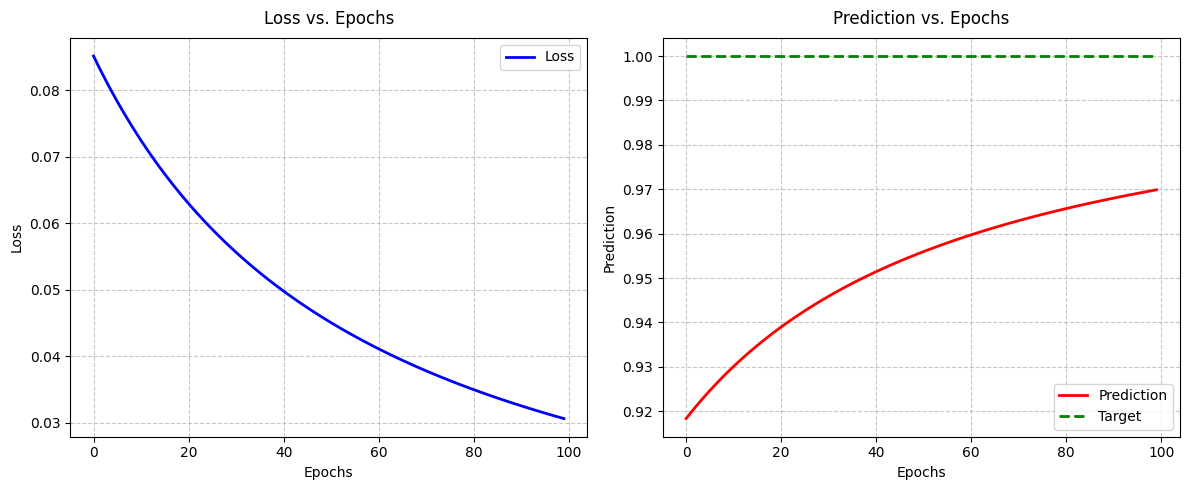

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 设置参数
x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])
learning_rate = 0.1

# 用于记录训练过程的列表
epochs = []
losses = []
predictions = []

# 训练循环
for epoch in range(100):
    # 前向传播
    z = x1 * w1 + b
    a = torch.sigmoid(z)
    loss = F.binary_cross_entropy(a, y)
    
    # 记录数据
    epochs.append(epoch)
    losses.append(loss.item())
    predictions.append(a.item())
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b -= learning_rate * b.grad
    
    # 清零梯度
    w1.grad.zero_()
    b.grad.zero_()

# 创建图表
plt.figure(figsize=(12, 5))

# 绘制Loss曲线
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, 'b-', linewidth=2, label='Loss')
plt.title('Loss vs. Epochs', fontsize=12, pad=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 绘制预测值曲线
plt.subplot(1, 2, 2)
plt.plot(epochs, predictions, 'r-', linewidth=2, label='Prediction')
plt.plot([0, len(epochs)-1], [y.item(), y.item()], 'g--', linewidth=2, label='Target')
plt.title('Prediction vs. Epochs', fontsize=12, pad=10)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Prediction', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()

In [4]:
#3D动态展示
import torch
import torch.nn.functional as F
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 设置参数
x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])
learning_rate = 0.1

# 用于记录训练过程的列表
w_history = []
b_history = []
loss_history = []

# 创建用于绘制损失曲面的网格点
w_range = np.linspace(-1, 4, 100)
b_range = np.linspace(-2, 2, 100)
w_grid, b_grid = np.meshgrid(w_range, b_range)

# 计算每个网格点的损失值
loss_grid = np.zeros_like(w_grid)
for i in range(w_grid.shape[0]):
    for j in range(w_grid.shape[1]):
        w_val = w_grid[i,j]
        b_val = b_grid[i,j]
        z = x1.item() * w_val + b_val
        a = 1 / (1 + np.exp(-z))
        loss_grid[i,j] = -(y.item() * np.log(a) + (1-y.item()) * np.log(1-a))

# 训练循环
for epoch in range(100):
    # 前向传播
    z = x1 * w1 + b
    a = torch.sigmoid(z)
    loss = F.binary_cross_entropy(a, y)
    
    # 记录参数和损失
    w_history.append(w1.item())
    b_history.append(b.item())
    loss_history.append(loss.item())
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b -= learning_rate * b.grad
    
    # 清零梯度
    w1.grad.zero_()
    b.grad.zero_()

# 创建3D可视化
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type': 'surface'}, {'type': 'scatter3d'}]],
                    subplot_titles=('Loss Surface', 'Gradient Descent Path'))

# 绘制损失曲面
fig.add_trace(
    go.Surface(x=w_grid, y=b_grid, z=loss_grid, 
               colorscale='viridis',
               name='Loss Surface'),
    row=1, col=1
)

# 绘制参数更新路径
fig.add_trace(
    go.Scatter3d(x=w_history, y=b_history, z=loss_history,
                 mode='lines+markers',
                 line=dict(color='red', width=4),
                 marker=dict(size=4, color=list(range(len(w_history))), 
                           colorscale='Reds'),
                 name='Gradient Path'),
    row=1, col=2
)

# 更新布局
fig.update_layout(
    title='Gradient Descent Visualization',
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Bias',
        zaxis_title='Loss',
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    scene2=dict(
        xaxis_title='Weight',
        yaxis_title='Bias',
        zaxis_title='Loss',
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    width=1200,
    height=600,
    showlegend=True
)

# 显示图表
fig.show()

# 创建动态2D投影图
fig2 = go.Figure()

# 添加等高线图
fig2.add_trace(
    go.Contour(
        x=w_range,
        y=b_range,
        z=loss_grid,
        colorscale='viridis',
        name='Loss Contour'
    )
)

# 添加参数更新路径
fig2.add_trace(
    go.Scatter(
        x=w_history,
        y=b_history,
        mode='lines+markers',
        line=dict(color='red', width=2),
        marker=dict(size=8, color=list(range(len(w_history))),
                   colorscale='Reds',
                   showscale=True),
        name='Gradient Path'
    )
)

# 更新布局
fig2.update_layout(
    title='Gradient Descent Path (2D View)',
    xaxis_title='Weight',
    yaxis_title='Bias',
    width=800,
    height=600
)

# 显示图表
fig2.show()

In [5]:
#动画过程
import torch
import torch.nn.functional as F
import numpy as np
import plotly.graph_objects as go

# 设置参数
x1 = torch.tensor([1.1], requires_grad=True)
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([1.0])
learning_rate = 0.1

# 用于记录训练过程的列表
w_history = []
b_history = []
loss_history = []

# 创建用于绘制损失曲面的网格点
w_range = np.linspace(-1, 4, 100)
b_range = np.linspace(-2, 2, 100)
w_grid, b_grid = np.meshgrid(w_range, b_range)

# 计算每个网格点的损失值
loss_grid = np.zeros_like(w_grid)
for i in range(w_grid.shape[0]):
    for j in range(w_grid.shape[1]):
        w_val = w_grid[i,j]
        b_val = b_grid[i,j]
        z = x1.item() * w_val + b_val
        a = 1 / (1 + np.exp(-z))
        loss_grid[i,j] = -(y.item() * np.log(a) + (1-y.item()) * np.log(1-a))

# 训练循环
for epoch in range(100):
    # 前向传播
    z = x1 * w1 + b
    a = torch.sigmoid(z)
    loss = F.binary_cross_entropy(a, y)
    
    # 记录参数和损失
    w_history.append(w1.item())
    b_history.append(b.item())
    loss_history.append(loss.item())
    
    # 反向传播
    loss.backward()
    
    # 更新参数
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b -= learning_rate * b.grad
    
    # 清零梯度
    w1.grad.zero_()
    b.grad.zero_()

# 创建3D可视化
fig = go.Figure()

# 添加损失曲面
fig.add_trace(
    go.Surface(
        x=w_grid,
        y=b_grid,
        z=loss_grid,
        colorscale='viridis',
        opacity=0.8,
        name='Loss Surface',
        showscale=False
    )
)

# 添加梯度下降路径
fig.add_trace(
    go.Scatter3d(
        x=w_history,
        y=b_history,
        z=loss_history,
        mode='lines+markers',
        line=dict(color='red', width=5),
        marker=dict(
            size=5,
            color=list(range(len(w_history))),
            colorscale='Reds',
            showscale=True,
            colorbar=dict(title='Training Progress')
        ),
        name='Gradient Path'
    )
)

# 添加当前点的投影到损失曲面上
fig.add_trace(
    go.Scatter3d(
        x=w_history,
        y=b_history,
        z=np.zeros_like(w_history) + np.min(loss_grid),
        mode='lines+markers',
        marker=dict(size=3, color='red'),
        line=dict(color='red', width=2, dash='dash'),
        showlegend=False
    )
)

# 添加垂直连接线
for i in range(len(w_history)):
    fig.add_trace(
        go.Scatter3d(
            x=[w_history[i], w_history[i]],
            y=[b_history[i], b_history[i]],
            z=[np.min(loss_grid), loss_history[i]],
            mode='lines',
            line=dict(color='red', width=1, dash='dash'),
            showlegend=False
        )
    )

# 更新布局
fig.update_layout(
    title=dict(
        text='3D Visualization of Gradient Descent',
        x=0.5,
        y=0.95,
        font=dict(size=20)
    ),
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Bias',
        zaxis_title='Loss',
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.5, y=1.5, z=1.5)
        ),
        aspectratio=dict(x=1, y=1, z=0.7)
    ),
    width=1000,
    height=800,
    showlegend=True
)

# 添加动画按钮
def create_frame(frame_id):
    return dict(
        data=[
            # 损失曲面保持不变
            dict(type='surface'),
            # 更新路径
            dict(
                type='scatter3d',
                x=w_history[:frame_id+1],
                y=b_history[:frame_id+1],
                z=loss_history[:frame_id+1]
            ),
            # 更新投影
            dict(
                type='scatter3d',
                x=w_history[:frame_id+1],
                y=b_history[:frame_id+1],
                z=np.zeros(frame_id+1) + np.min(loss_grid)
            )
        ]
    )

frames = [create_frame(i) for i in range(len(w_history))]

fig.frames = frames

# 添加播放按钮
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(label="Play",
                     method="animate",
                     args=[None, dict(frame=dict(duration=50, redraw=True),
                                    fromcurrent=True,
                                    mode='immediate')]),
                dict(label="Pause",
                     method="animate",
                     args=[[None], dict(frame=dict(duration=0, redraw=False),
                                      mode='immediate')])
            ],
            x=0.1,
            y=0,
            xanchor="right",
            yanchor="top"
        )
    ]
)

# 显示图表
fig.show()

## A.5 多层神经网络的实现

In [6]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(
                
            # 第一个隐藏层
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 第二个隐藏层
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # 输出层
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

In [7]:
model = NeuralNetwork(50, 3)

In [8]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [9]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)# 打印训练模型的参数

Total number of trainable model parameters: 2213


In [10]:
print(model.layers[0].weight) # 打印神经网络模型的第一层的权重

Parameter containing:
tensor([[ 0.0135, -0.0655, -0.1177,  ...,  0.0482,  0.1193, -0.0740],
        [-0.1100, -0.1207, -0.1128,  ..., -0.0279,  0.1233, -0.0049],
        [-0.1390, -0.1115,  0.0122,  ...,  0.1316,  0.0983, -0.0930],
        ...,
        [ 0.0667, -0.0308, -0.1225,  ...,  0.0189,  0.0570,  0.1271],
        [-0.1275, -0.1350,  0.0812,  ..., -0.0930, -0.0567,  0.1055],
        [-0.1291, -0.0160, -0.1239,  ..., -0.0042, -0.0316,  0.1408]],
       requires_grad=True)


In [11]:
# 设置随机数种子，以确保可复现性
torch.manual_seed(123)

# 假设 NeuralNetwork 是一个神经网络类，且其构造函数接受两个参数，分别为输入特征的维度和输出特征的维度
model = NeuralNetwork(50, 3)

# 打印神经网络模型的第一层的权重
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [12]:
# 打印神经网络模型的第一层权重的形状
print(model.layers[0].weight.shape)

torch.Size([30, 50])


In [13]:
# 设置随机数种子，以确保可复现性
torch.manual_seed(123)

# 模型输入特征的维度为 50
X = torch.rand((1, 50))

# 使用模型进行前向传播计算输出
out = model(X)

# 打印输出结果
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


In [14]:
# 使用 torch.no_grad() 上下文管理器，以便在推断时不计算梯度
with torch.no_grad():
    out = model(X)
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


In [ ]:
with torch.no_grad():
    out = torch.softmax(model(X), dim=1)
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


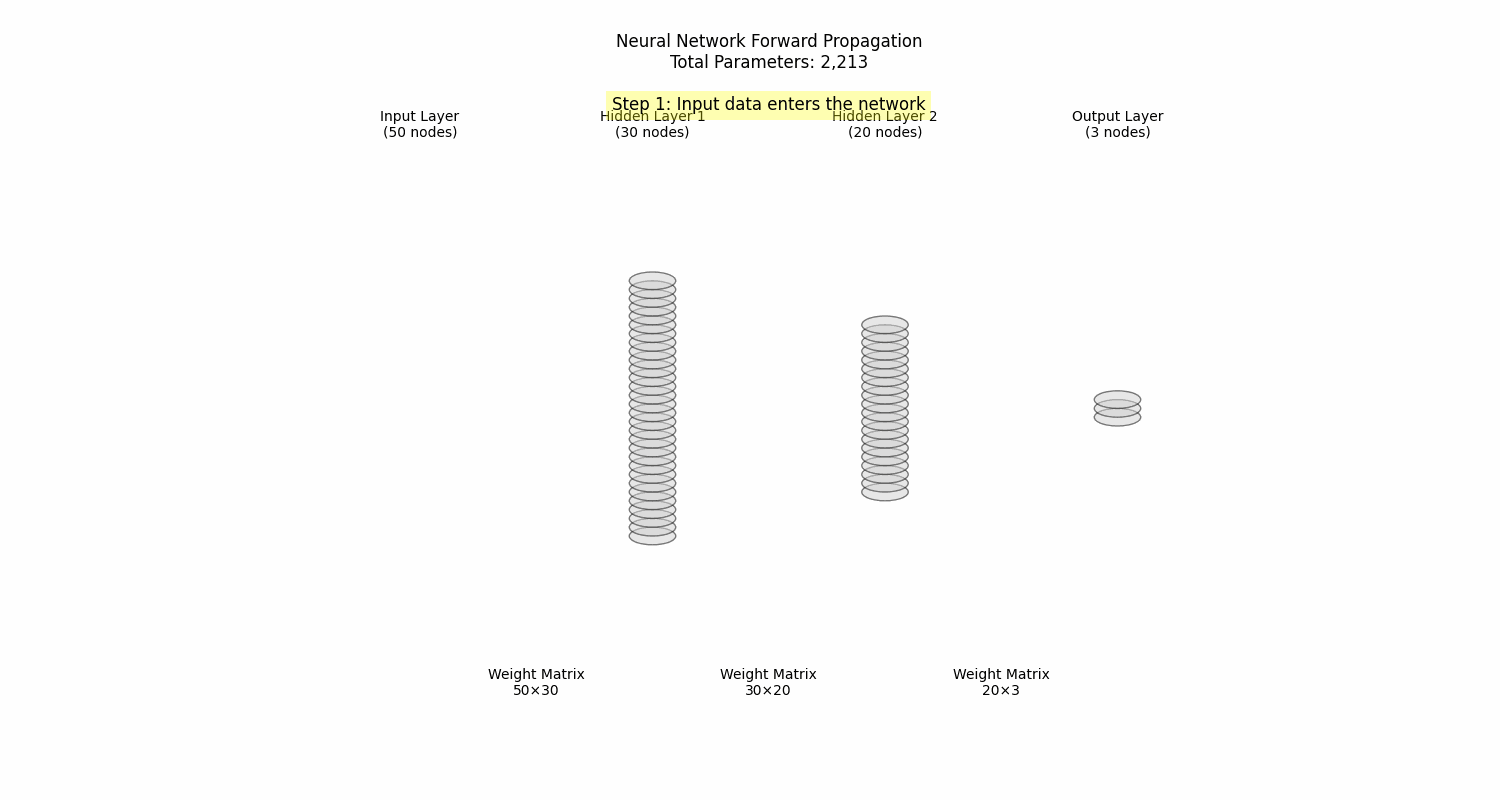

Animation saved as neural_network_flow.gif


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches

def create_network_animation(model, save_path='neural_network_flow.gif'):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    layer_sizes = [50, 30, 20, 3]
    
    def init():
        ax.clear()
        ax.set_xlim(-1, 4)
        ax.set_ylim(-1, 6)
        ax.axis('off')
        return []
    
    def animate(frame):
        ax.clear()
        ax.set_xlim(-1, 4)
        ax.set_ylim(-1, 6)
        ax.axis('off')
        
        # 计算当前活跃层
        active_layer = frame // 10  # 每10帧切换一个层
        
        # 计算节点位置
        layer_positions = []
        max_neurons = max(layer_sizes)
        
        for i, size in enumerate(layer_sizes):
            layer_x = i
            neurons = []
            spacing = 5.0 / max_neurons
            start = (max_neurons - size) * spacing / 2
            
            for j in range(size):
                neuron_y = start + j * spacing
                neurons.append((layer_x, neuron_y))
            layer_positions.append(neurons)
        
        # 绘制连接
        for i in range(len(layer_sizes)-1):
            if i <= active_layer:
                alpha = 1.0 if i < active_layer else (frame % 10) / 10
                for j, pos1 in enumerate(layer_positions[i]):
                    for k, pos2 in enumerate(layer_positions[i+1]):
                        ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 
                               color='gray', alpha=0.1*alpha)
        
        # 绘制节点
        colors = ['#FFA07A', '#98FB98', '#87CEFA', '#DDA0DD']
        for i, layer in enumerate(layer_positions):
            for x, y in layer:
                # 设置节点颜色和亮度
                if i < active_layer:
                    # 已激活的层
                    color = colors[i]
                    alpha = 1.0
                elif i == active_layer:
                    # 当前正在激活的层
                    color = colors[i]
                    alpha = (frame % 10) / 10
                else:
                    # 未激活的层
                    color = 'lightgray'
                    alpha = 0.5
                    
                circle = plt.Circle((x, y), 0.1, color=color, ec='black', alpha=alpha)
                ax.add_patch(circle)
        
        # 添加层标签和说明
        labels = ['Input Layer', 'Hidden Layer 1', 'Hidden Layer 2', 'Output Layer']
        for i, (label, size) in enumerate(zip(labels, layer_sizes)):
            # 添加层标签
            ax.text(i, 5.5, f'{label}\n({size} nodes)', 
                   ha='center', va='bottom',
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
            
            # 添加权重矩阵信息
            if i < len(layer_sizes)-1:
                weight_shape = f'Weight Matrix\n{layer_sizes[i]}×{layer_sizes[i+1]}'
                ax.text(i + 0.5, -0.5, weight_shape,
                       ha='center', va='top',
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        # 添加动画阶段说明
        stages = [
            "Step 1: Input data enters the network",
            "Step 2: Data propagates through first hidden layer",
            "Step 3: Information flows through second hidden layer",
            "Step 4: Final output is produced"
        ]
        if active_layer < len(stages):
            ax.text(1.5, 6, stages[active_layer], 
                   ha='center', va='top', fontsize=12,
                   bbox=dict(facecolor='yellow', alpha=0.3, edgecolor='none'))
        
        total_params = sum((layer_sizes[i] * layer_sizes[i+1] + layer_sizes[i+1]) 
                          for i in range(len(layer_sizes)-1))
        ax.set_title(f'Neural Network Forward Propagation\nTotal Parameters: {total_params:,}',
                    pad=20)
        
        return []
    
    # 创建动画
    anim = FuncAnimation(fig, animate, init_func=init,
                        frames=40, interval=200, blit=True)
    
    # 保存为GIF
    writer = PillowWriter(fps=10)
    anim.save(save_path, writer=writer)
    
    plt.close()
    
    return save_path

# 创建模型
torch.manual_seed(123)
model = NeuralNetwork(50, 3)

# 创建并保存动画
gif_path = create_network_animation(model)

# 在Jupyter中显示保存的GIF
from IPython.display import Image
display(Image(filename=gif_path))

print(f"Animation saved as {gif_path}")

## A.6 建立高效的数据加载器

In [29]:
# 定义输入特征张量 X_train
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

# 定义对应的标签张量 y_train
y_train = torch.tensor([0, 0, 0, 1, 1])

In [30]:
X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

In [31]:
from torch.utils.data import Dataset


class ToyDataset(Dataset):
    # 初始化 ToyDataset 类
    def __init__(self, X, y):
        self.features = X
        self.labels = y
    #  获取指定索引的数据
    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]        
        return one_x, one_y
    # 获取数据集的长度
    def __len__(self):
        return self.labels.shape[0]
# 创建训练数据集和测试数据集实例
train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

In [ ]:
len(train_ds)

In [33]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

# 创建训练数据加载器 train_loader
# dataset 参数传入了您定义的 ToyDataset 类的实例 train_ds
# batch_size 参数指定了每个批次包含的样本数量
# shuffle 参数指定是否在每个 epoch 之前对数据进行洗牌
# num_workers 参数指定用于数据加载的子进程数量
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

In [34]:
test_ds = ToyDataset(X_test, y_test)

# 创建测试数据加载器 test_loader
# dataset 参数传入了您定义的 ToyDataset 类的实例 test_ds
# batch_size 参数指定了每个批次包含的样本数量
# shuffle 参数指定是否在每个 epoch 之前对数据进行洗牌，这里设为 False 表示不洗牌
# num_workers 参数指定用于数据加载的子进程数量
test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

In [ ]:
# 迭代训练数据加载器 train_loader
for idx, (x, y) in enumerate(train_loader):
    # 打印每个批次的索引、输入特征和对应的标签
    print(f"Batch {idx+1}:", x, y)

In [36]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    drop_last=True
)

In [ ]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

## A.7 一个示例训练轮次

In [ ]:
import torch.nn.functional as F


torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

num_epochs = 3

for epoch in range(num_epochs):
    
    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)
        
        loss = F.cross_entropy(logits, labels) # 损失函数
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        ### 日志
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    model.eval()
    # 可选的模型评估指标

In [ ]:
model.eval()

with torch.no_grad():
    outputs = model(X_train)

print(outputs)

In [ ]:
# 设置 PyTorch 的打印选项，以关闭科学计数法
torch.set_printoptions(sci_mode=False)

# 假设 outputs 是模型的输出张量

# 对模型的输出进行 softmax 操作，计算类别概率
probas = torch.softmax(outputs, dim=1)
print(probas)

# 获取模型的预测结果，即具有最大概率的类别
predictions = torch.argmax(outputs, dim=1)
print(predictions)

In [ ]:
# 使用 torch.argmax() 函数沿着 dim=1 维度获取每个样本最大值的索引，即模型的预测结果
predictions = torch.argmax(outputs, dim=1)
print(predictions)

In [ ]:
predictions == y_train

In [ ]:
torch.sum(predictions == y_train)

In [44]:
def compute_accuracy(model, dataloader):
    """
    计算模型在给定数据加载器上的准确率。

    参数：
        model (torch.nn.Module): 待评估的模型。
        dataloader (torch.utils.data.DataLoader): 包含输入数据的数据加载器。

    返回：
        float: 准确率值。
    """
    # 将模型设为评估模式
    model = model.eval()
    correct = 0.0
    total_examples = 0
    
    # 遍历数据加载器
    for idx, (features, labels) in enumerate(dataloader):
        
        # 使用 no_grad 上下文，以便不跟踪梯度
        with torch.no_grad():
            # 使用模型进行前向传播获取预测结果
            logits = model(features)
        
        # 获取预测结果并计算正确预测的数量
        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    # 计算并返回准确率
    return (correct / total_examples).item()

In [ ]:
compute_accuracy(model, train_loader)

In [ ]:
compute_accuracy(model, test_loader)

## A.8 保存并加载模型

In [47]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
model = NeuralNetwork(2, 2) # 需要与原始模型完全匹配
model.load_state_dict(torch.load("model.pth"))

## A.9 使用GPU来优化训练性能

### A.9.1 在GPU上进行 PyTorch 的运算

See [code-part2.ipynb](code-part2.ipynb)  

### A.9.2 单个GPU的训练

See [code-part2.ipynb](code-part2.ipynb)

### A.9.3 多GPU的训练

See [DDP-script.py](DDP-script.py)